# Imports and loading data

In [3]:
#Basics
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for aesthetics
sns.set(style = 'darkgrid', font_scale = 1.4)

In [4]:
# Load the data
df = pd.read_csv('../raw_data/train.csv')
df_test = pd.read_csv('../raw_data/test.csv')

# Data

## Comparing train and test features

In [5]:
print(f'Train set shape: {df.shape}')
print(f'Test set shape: {df_test.shape}')
df.head()

Train set shape: (8693, 14)
Test set shape: (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Feature Descriptions:**

- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df.nunique().sort_values()

CryoSleep          2
VIP                2
Transported        2
HomePlanet         3
Destination        3
Age               80
ShoppingMall    1115
RoomService     1273
VRDeck          1306
Spa             1327
FoodCourt       1507
Cabin           6560
Name            8473
PassengerId     8693
dtype: int64

### Comparing Missing Values

In [8]:
train_na = df.isna().sum().drop(index = 'Transported')
test_na = df_test.isna().sum()
train_na_perc = (train_na/df.count().drop(index = 'Transported'))*100
test_na_perc = (test_na/df_test.count())*100
diff_na_perc = abs(train_na_perc - test_na_perc)

pd.concat([train_na, test_na,train_na_perc.round(2), test_na_perc.round(2), diff_na_perc], axis = 1)\
            .rename(columns = {0:'Train NA #', 1:'Test NA #', 2:'Train NA %', 3:'Test NA %', 4:'Difference %'})

,Train NA #,Test NA #,Train NA %,Test NA %,Difference %
PassengerId,0,0,0.00,0.00,0.000000
HomePlanet,201,87,2.37,2.08,0.290561
CryoSleep,217,93,2.56,2.22,0.337417
Cabin,199,100,2.34,2.39,0.051232
Destination,182,92,2.14,2.20,0.059918
Age,179,91,2.10,2.17,0.071493
VIP,203,93,2.39,2.22,0.168295
RoomService,181,82,2.13,1.95,0.171702
FoodCourt,183,106,2.15,2.54,0.390946
ShoppingMall,208,98,2.45,2.35,0.106326


As the **Difference (%)** column makes clear, the difference in missing values between the test and train datasets is smaller than 0.4% in all cases.

Hence, it is negligible across the board.

### Comparing the distribution of data

**Categorical Features**

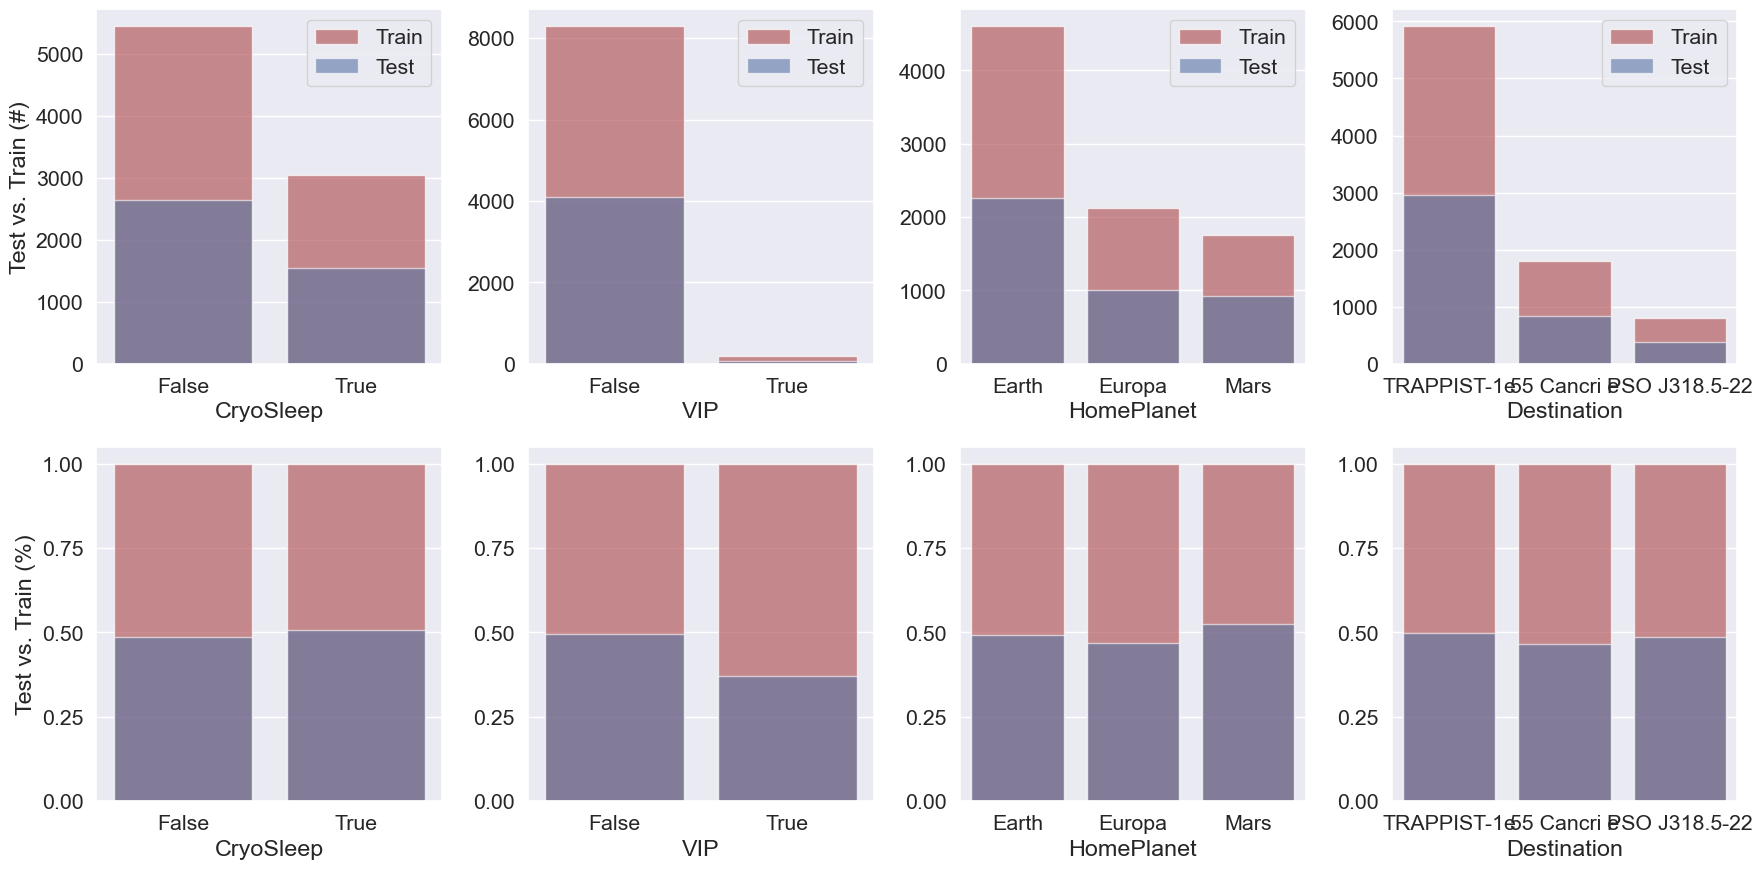

In [159]:
cat_features = ['CryoSleep', 'VIP', 'HomePlanet', 'Destination']

fig = plt.figure(figsize=(18, 9))

for index, feature in enumerate(cat_features):
    
    ax = fig.add_subplot(2, 4, index + 1)
    
    order = df.groupby(feature).count()['PassengerId'].sort_values(ascending = False).index
    
    sns.countplot(data = df, x = feature, color = 'r', label = 'Train', order = order, alpha = 0.7)
    sns.countplot(data = df_test, x = feature, color = 'b', label = 'Test', order = order, alpha = 0.6)
    plt.legend()
    if index == 0:    
        plt.ylabel('Test vs. Train (#)')
    else:
        plt.ylabel('')
    
    ax = fig.add_subplot(2, 4, index + 5)
    
    proportion = df_test.groupby(feature).count()['PassengerId'] / df.groupby(feature).count()['PassengerId']
    proportion = proportion.reset_index().rename(columns = {'PassengerId':'Test vs. Train (%)'})
    
    sns.barplot(data = proportion, x = feature, y = np.full(proportion.shape[0], 1), color = 'r', order = order, alpha = 0.7)
    sns.barplot(data = proportion, x = feature, y = 'Test vs. Train (%)', color = 'b', order = order, alpha = 0.6)
    
    plt.yticks(np.arange(0, 1.01, 0.25))
    
    if index == 0:    
        plt.ylabel('Test vs. Train (%)')
    else:
        plt.ylabel('')
    
plt.tight_layout()
plt.show()

In [ ]:
expend_features = ['ShoppingMall','RoomService','VRDeck','Spa','FoodCourt']

fig = plt.figure(figsize=(10, 20))

for index, feature in enumerate(expend_features):

    ax = fig.add_subplot(5, 2, 2 * index + 1)
    sns.histplot(data = df, x = feature, axes = ax, bins = 30, color = 'r', label = 'Train', alpha = 0.65)
    sns.histplot(data = df_test, x = feature, axes = ax, bins = 30, color = 'b', label = 'Test', alpha = 0.65)
    plt.legend()
    plt.xlabel(f'{feature} (Total)')
    plt.ylabel('Count')

    ax = fig.add_subplot(5, 2, 2 * (index + 1))
    sns.histplot(data = df, x = feature, axes = ax, kde = True, bins = 30, color = 'r', label = 'Train', alpha = 0.5)
    sns.histplot(data = df_test, x = feature, axes = ax, kde = True, bins = 30, color = 'b', label = 'Test', alpha = 0.5)
    plt.legend()
    plt.ylim([0, 100])
    plt.xlabel(f'{feature} (Limit: 100)')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

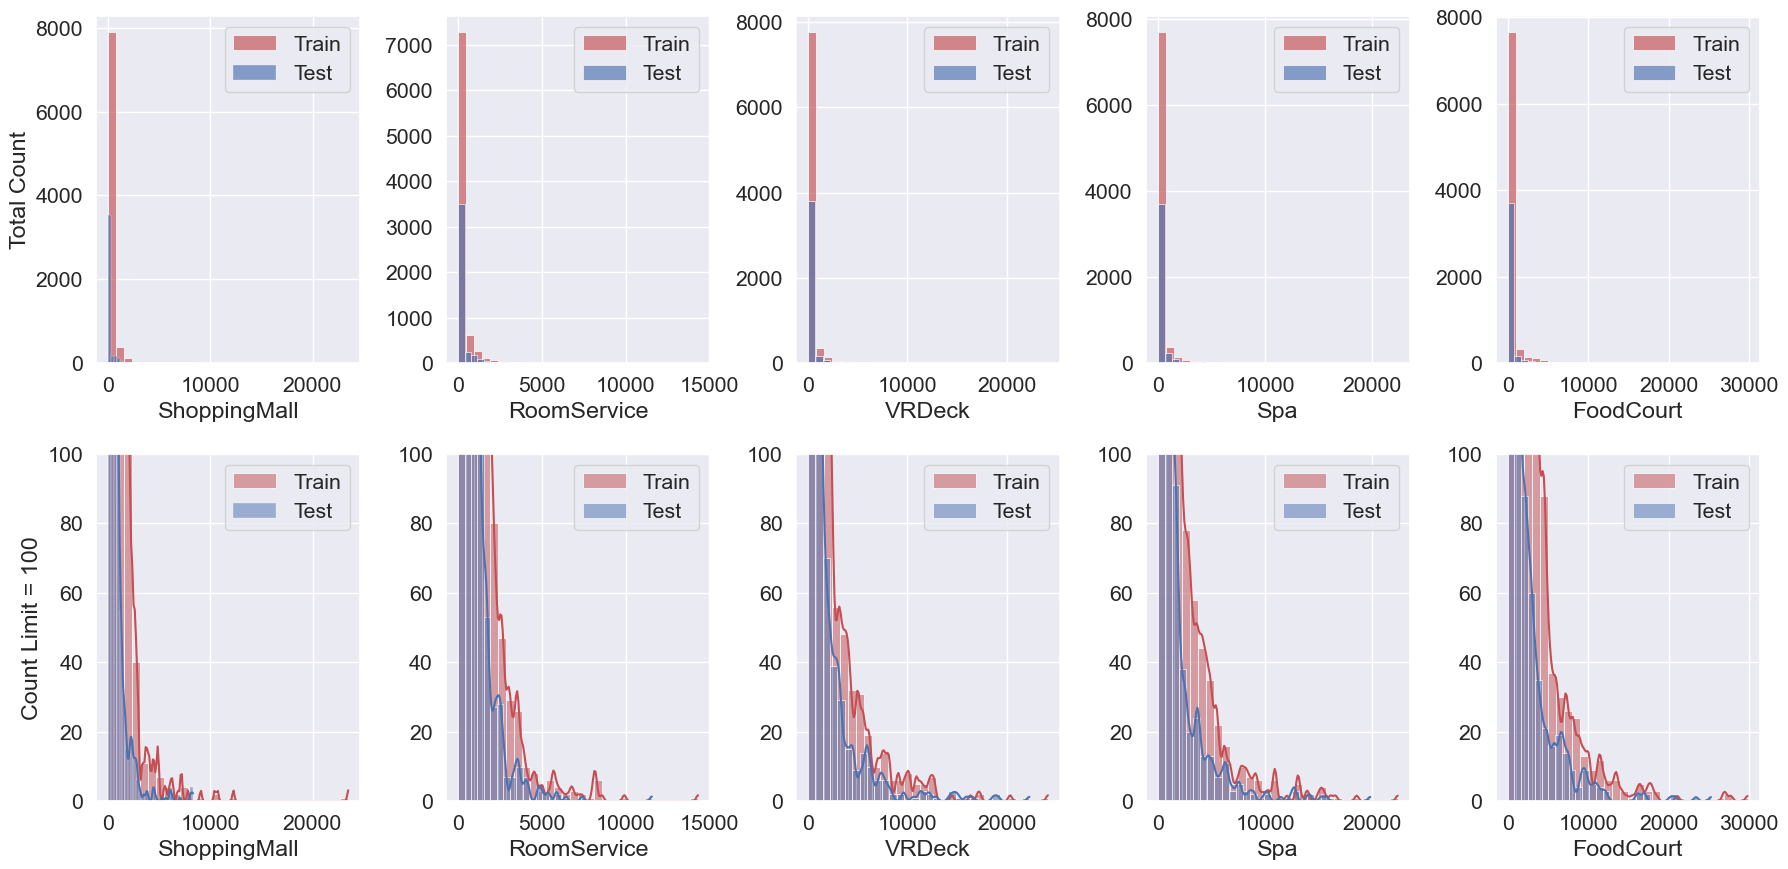

In [162]:
expend_features = ['ShoppingMall','RoomService','VRDeck','Spa','FoodCourt']

fig = plt.figure(figsize=(18, 9))

for index, feature in enumerate(expend_features):

    ax = fig.add_subplot(2, 5, index + 1)
    sns.histplot(data = df, x = feature, axes = ax, bins = 30, color = 'r', label = 'Train', alpha = 0.65)
    sns.histplot(data = df_test, x = feature, axes = ax, bins = 30, color = 'b', label = 'Test', alpha = 0.65)
    plt.legend()
    if index == 0:
        plt.ylabel('Total Count')
    else:
        plt.ylabel('')

    ax = fig.add_subplot(2, 5, index + 6)
    sns.histplot(data = df, x = feature, axes = ax, kde = True, bins = 30, color = 'r', label = 'Train', alpha = 0.5)
    sns.histplot(data = df_test, x = feature, axes = ax, kde = True, bins = 30, color = 'b', label = 'Test', alpha = 0.5)
    plt.legend()
    plt.ylim([0, 100])
    if index == 0:
        plt.ylabel('Count Limit = 100')
    else:
        plt.ylabel('')
    
plt.tight_layout()
plt.show()

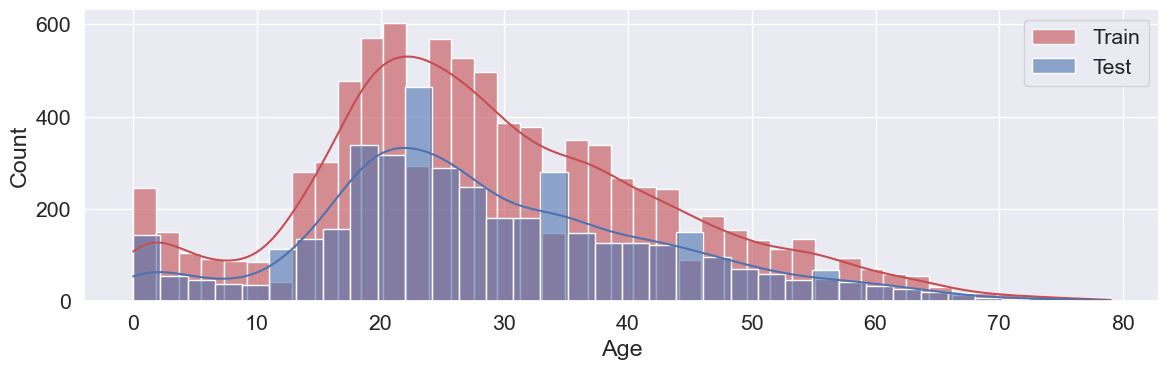

In [47]:
plt.figure(figsize=(12, 4))
sns.histplot(data = df, x = 'Age', color = 'r', label = 'Train', kde = True, alpha = 0.6)
sns.histplot(data = df_test, x = 'Age', color = 'b', label = 'Test', kde = True, alpha = 0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Target and Feature Exploration

### Categorical Features

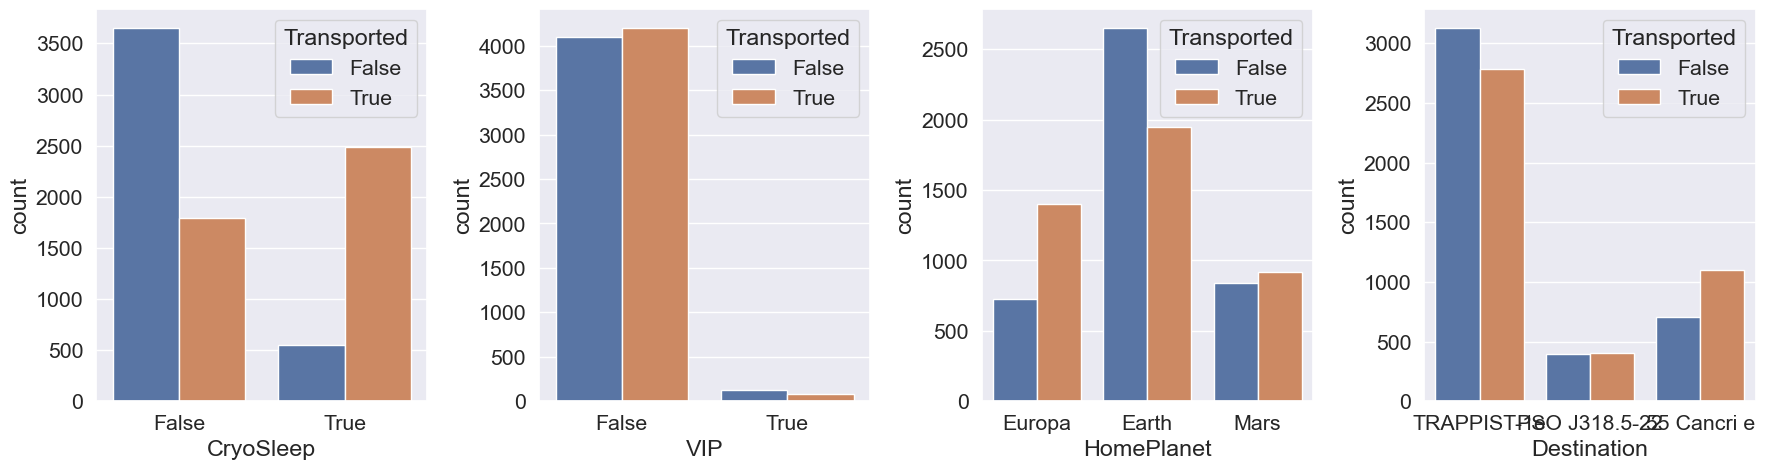

In [49]:
cat_features = ['CryoSleep', 'VIP', 'HomePlanet', 'Destination']

fig = plt.figure(figsize=(18, 5))

for index, feature in enumerate(cat_features):
    
    ax = fig.add_subplot(1, 4, index + 1)
    sns.countplot(data = df, x = feature, hue = 'Transported', axes = ax)

plt.tight_layout()
plt.show()

## Data Visualization

### Basic data visualization of categorical features.

What we are looking for here are interesting correlations between the target and the categorical features. 

'CryoSleep' looks like a promising feature:

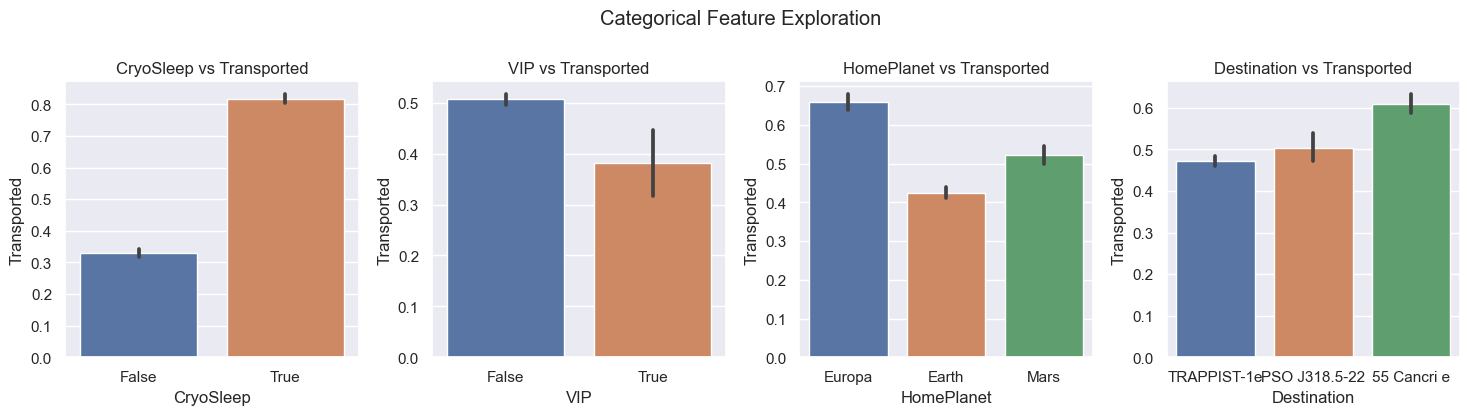

In [8]:
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)
sns.barplot(x = 'CryoSleep', y = 'Transported', data = df)
plt.title('CryoSleep vs Transported')

plt.subplot(1,4,2)
sns.barplot(x = 'VIP', y = 'Transported', data = df)
plt.title('VIP vs Transported')

plt.subplot(1,4,3) 
sns.barplot(x = 'HomePlanet', y = 'Transported', data = df)
plt.title('HomePlanet vs Transported')

plt.subplot(1,4,4)
sns.barplot(x = 'Destination', y = 'Transported', data = df)
plt.title('Destination vs Transported')

plt.subplots_adjust(top = 0.80, wspace = 0.25)

plt.suptitle('Categorical Feature Exploration')
plt.show()

We know from the dataset description that 'Cabin' takes the form *deck/num/side*, where side can be either P for *Port* or S for *Starboard*.

Hence, in order to explore possible correlations in that area, we need to split the information into three more columns:

In [9]:
# .fillna('NA/NA/NA') ensures that we don't get an error when applying the .split or indexing. 

df['Side'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[2])
df['Number'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[1])
df['Deck'] = df['Cabin'].fillna('NA/NA/NA').apply(lambda x: x.split('/')[0])

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Side,Number,Deck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P,0,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S,0,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S,0,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S,0,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S,1,F


In [10]:
# How many passengers in each side?
df.groupby('Side').count()['PassengerId']

Side
NA     199
P     4206
S     4288
Name: PassengerId, dtype: int64

In [11]:
# How many passengers in each deck?
df.groupby('Deck').count()['PassengerId']

Deck
A      256
B      779
C      747
D      478
E      876
F     2794
G     2559
NA     199
T        5
Name: PassengerId, dtype: int64

In [12]:
df['Number'].nunique()

1818

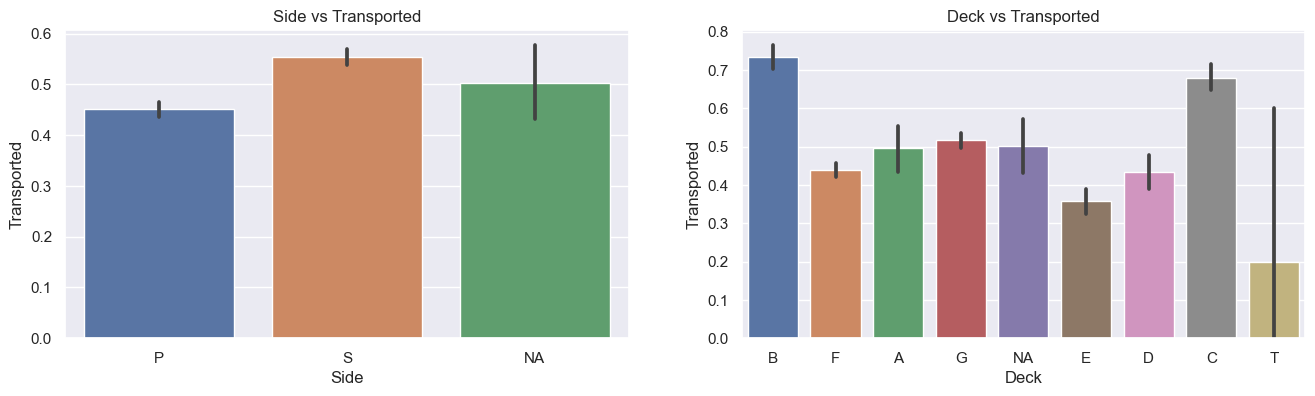

In [13]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.barplot(x = 'Side', y = 'Transported', data = df)
plt.title('Side vs Transported')

plt.subplot(1,2,2)
sns.barplot(x = 'Deck', y = 'Transported', data = df)
plt.title('Deck vs Transported')

plt.show()

<AxesSubplot: xlabel='Deck', ylabel='VIP'>

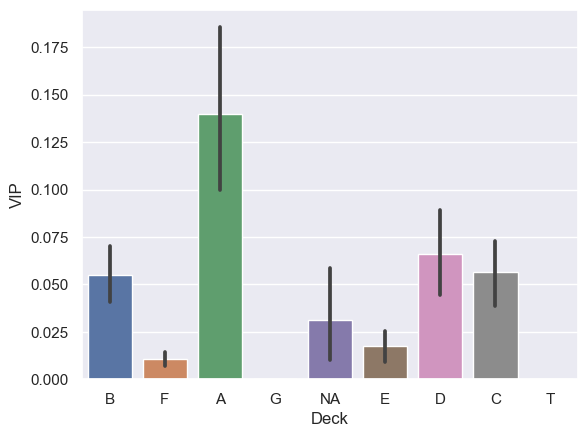

In [14]:
sns.barplot(x = 'Deck', y ='VIP', data = df)

In [15]:
sns.barplot(x = 'Deck', y = 'Destination', data = df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
sns.catplot(data = df, y = 'Age', x = 'Transported', hue = 'VIP', kind = 'violin')

In [ ]:
sns.histplot(data = df, x = 'RoomService', bins = 20)

In [ ]:
sns.histplot(data = df[df['RoomService'] < 500], x = 'RoomService', bins = 20)

In [ ]:
df['CleanRoomService'] = df['RoomService'].apply(lambda x: 'paid' if x > 0 else 'not_paid')
sns.barplot(data = df, x = 'CleanRoomService', y = 'Transported')

In [ ]:
sns.scatterplot(data = df, x = 'RoomService', y = 'FoodCourt')

In [ ]:
sns.catplot(data = df[df['RoomService'] < 2500], y = 'RoomService', x = 'Transported', kind = 'boxen')
sns.catplot(data = df[df['FoodCourt'] < 2500], y = 'FoodCourt', x = 'Transported', kind = 'boxen')

plt.show()